### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>
(You can find the data relation diagram on iLearn - Portfolio Part 1 resources - Fig1)


 #### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [2]:
# your code and solutions

# Load the data file and display the DataFrame:
import pandas as pd
df = pd.read_csv('The E-commerce Dataset.csv')
print ('The current DataFrame: ',"\n", df.head(5))

# As the missing values in column "review" are denoted as 'none', we will replace them with Null values directly into the current DataFrame:
df['review'].replace('none', pd.NA, inplace=True)

# Count number of Null values in each column:
print ('Number of Null values in each column: ', "\n", df.isna().sum())

# The length of the DataFrame before removing the missing data aka Null values:
print ('The length of the DataFrame before removing the missing data: ', len(df))

# Remove records with missing data in [render/rating/helpfulness and review] columns, then save the cleaned DataFrame into a new DataFrame:
df_cleaned = df.dropna(subset = ['gender', 'rating', 'helpfulness', 'review'])
# The length of the DataFrame after removing the missing data aka Null values:
print ('The length of the DataFrame after removing the missing data: ', len(df_cleaned))


The current DataFrame:  
    userId  timestamp                           review                  item  \
0    4051      12807        Great job for what it is!                  eBay   
1    4052     122899      Free Access Worth your Time               NetZero   
2      33      12700    AOL..I love you!!!!!!!!!!!!    AOL (America Online)   
3      33      21000     EBAY!!!  I LOVE YOU!!!! :-)*                  eBay   
4      33      22300  Blair Witch...Oh Come On.......   Blair Witch Project   

   rating  helpfulness gender                  category  item_id  item_price  \
0     5.0          2.0      F  Online Stores & Services       88      149.00   
1     5.0          0.0      F  Online Stores & Services       46       53.00   
2     5.0          4.0      F  Online Stores & Services        0      145.84   
3     5.0          4.0      F  Online Stores & Services       88      149.00   
4     1.0          4.0      F                    Movies       12       44.00   

   user_city  
0  

#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [3]:
# your code and solutions
# Q2.1: Total number of unique users, unique reviews, unique items, and unique categories in the given data:
## Version 1: Using the nunique() method to count the number of unique values in each column  
                                                                # by specifying the column name as an argument to the nunique() method:
unique_users = df_cleaned['userId'].nunique()
print (f'Unique users: {unique_users}')

unique_reviews = df_cleaned['review'].nunique()
print(f'Unique reviews: {unique_reviews}')

unique_items = df_cleaned['item'].nunique()
print(f'Unique items: {unique_items}')

unique_categories = df_cleaned['category'].nunique()
print(f'Unique categories: {unique_categories}')

## Version 2: Using the nunique() method to count the number of unique values in each column in the entire DataFrame:
df_cleaned.nunique()


Unique users: 8562
Unique reviews: 19459
Unique items: 89
Unique categories: 9


userId          8562
timestamp       2283
review         19459
item              89
rating             5
helpfulness        5
gender             2
category           9
item_id           89
item_price        83
user_city         40
dtype: int64

In [35]:
# Q2.2: Descriptive statistics: the total number, mean, std, min and max regarding all rating records, etc
total_rating = round(df_cleaned['rating'].describe(),3) # Using the describe() method to get the descriptive statistics of the 'rating' column and 
                                                        # rounding the results to 3 decimal places.
print(total_rating)

count    19916.000
mean         3.702
std          1.404
min          1.000
25%          3.000
50%          4.000
75%          5.000
max          5.000
Name: rating, dtype: float64


In [48]:
# Q2.3: Descriptive statistics: mean, std, max, and min of the number of items rated by different genders
## Group by gender and count the number of items rated by each gender

print ('Number of items rated by different genders: ')
gender_item_counts = df_cleaned.groupby('gender')['item'].count()                   # Group by gender and count the number of items
df_gender_item_counts = gender_item_counts.reset_index ()                           # Convert the resulting Series to a DataFrame using the reset_index() method
df_gender_item_counts.columns = ['Gender', 'Count']                                 # Rename the columns of the resulting DataFrame
print (df_gender_item_counts.to_string(index=False))

print ('------------------------------------')

## Descriptive statistics of the number of items rated by different genders
print ('Descriptive statistics of the number of items rated by different genders: ')
mean_items = gender_item_counts.mean()
std_items = gender_item_counts.std()
max_items = gender_item_counts.max()
min_items = gender_item_counts.min()

print ('Mean: ', round(mean_items, 3))
print ('Standard deviation: ', round(std_items, 3))
print ('Maximum: ', round(max_items, 3))
print ('Minimum: ', round(min_items, 3))


Number of items rated by different genders: 
Gender  Count
     F   9793
     M  10123
------------------------------------
Descriptive statistics of the number of items rated by different genders: 
Mean:  9958.0
Standard deviation:  233.345
Maximum:  10123
Minimum:  9793


In [52]:
# Q2.4 Descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items
## Group by item and count the number of ratings received by each item
print ('Number of ratings received by each item: ')
item_rating_counts = df_cleaned.groupby('item')['rating'].count()
df_item_rating_counts = item_rating_counts.reset_index()
df_item_rating_counts.columns = ['Item', 'Count']
print (df_item_rating_counts.to_string(index=False))

print ('------------------------------------')

## Descriptive statistics of the number of ratings that received by each items
print ('Descriptive statistics of the number of ratings that received by each items: ')

mean_ratings = item_rating_counts.mean()
std_ratings = item_rating_counts.std()
max_ratings = item_rating_counts.max()
min_ratings = item_rating_counts.min()

print ('Mean: ', round(mean_ratings, 3))
print ('Standard deviation: ', round(std_ratings, 3))
print ('Maximum: ', round(max_ratings, 3))
print ('Minimum: ', round(min_ratings, 3))

Number of ratings received by each item: 
                                                 Item  Count
                                 AOL (America Online)    939
                                        All Advantage    657
                                Alta Vista (by 1stUp)    157
                                           Amazon.com    240
                                    American Airlines    185
                                      American Beauty    280
                                         American Pie    315
                                     Any Given Sunday    166
                                           Applebee's    141
                Austin Powers: The Spy Who Shagged Me    239
                                      Bank of America    203
                                 Being John Malkovich    162
                                  Blair Witch Project    339
                            Blue Mountain Arts eCards    284
                                         Bl

In [53]:
desc_stats_ratings = round(item_rating_counts.describe(),1)
print(desc_stats_ratings)

count     89.0
mean     223.8
std      116.4
min      139.0
25%      162.0
50%      187.0
75%      245.0
max      939.0
Name: rating, dtype: float64


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

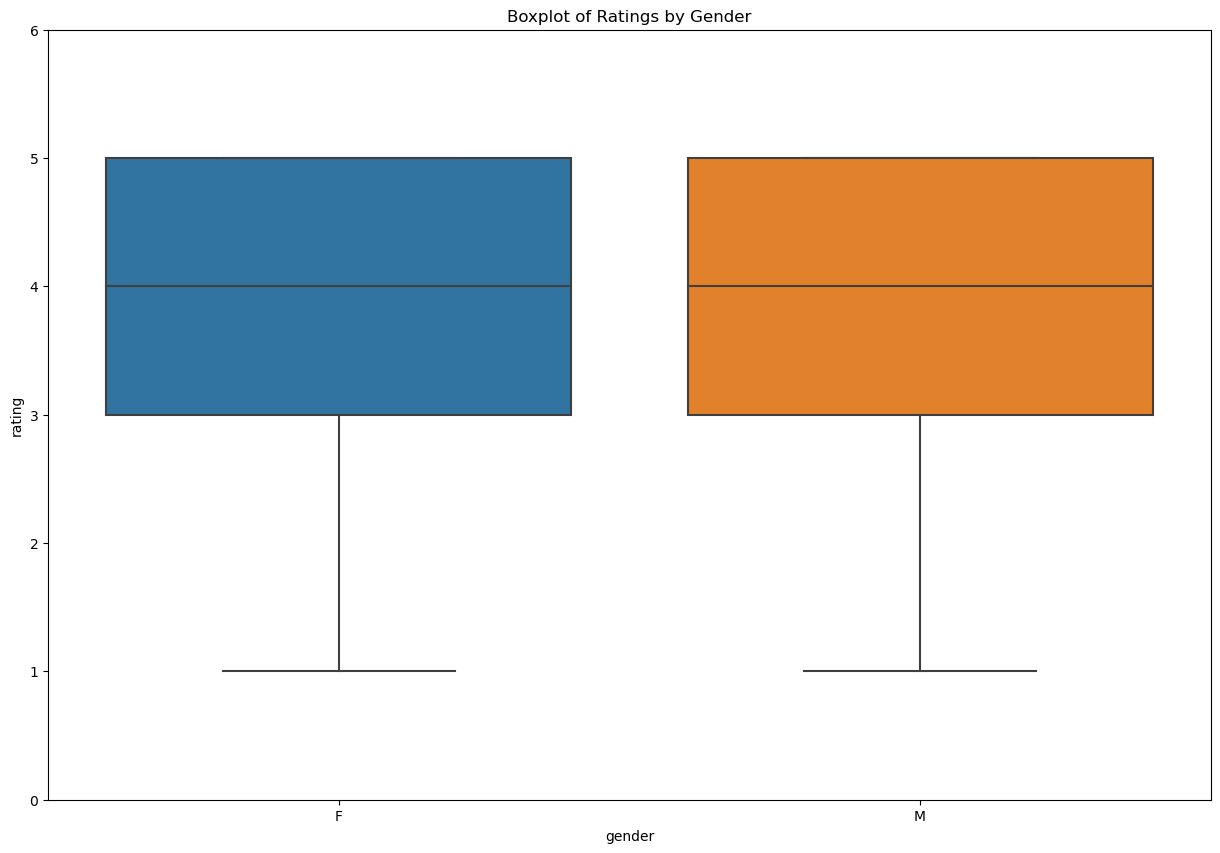

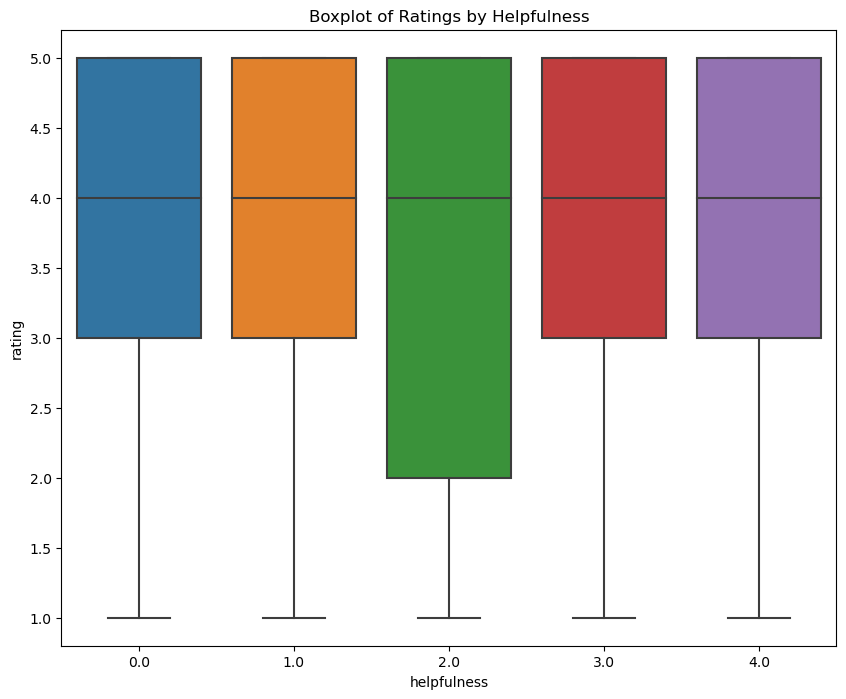

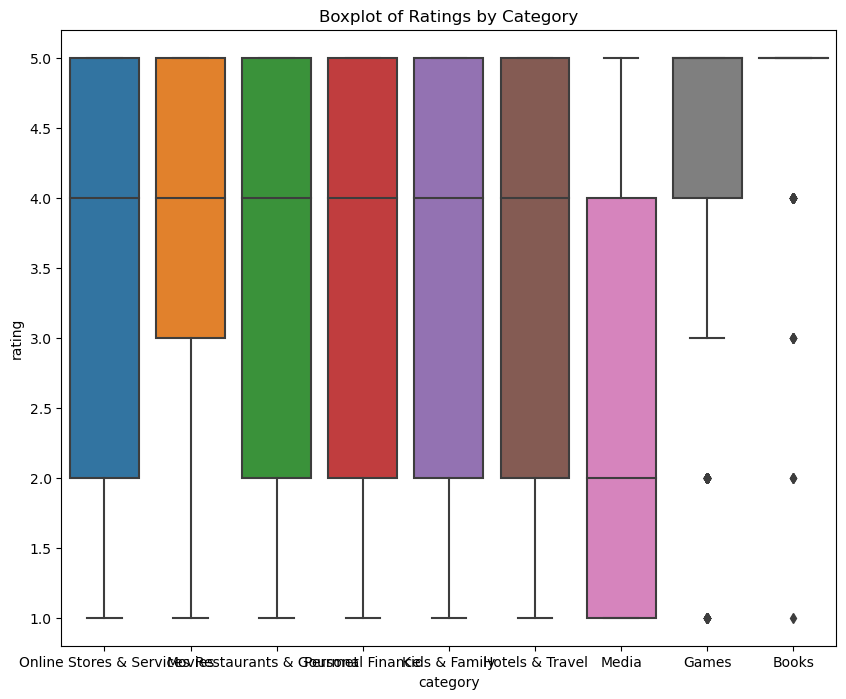

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for gender vs ratings
plt.figure(figsize=(15, 10)) #Width, height in inches.
sns.boxplot(x='gender', y='rating', data=df_cleaned)
plt.title('Boxplot of Ratings by Gender', fontsize = 12)
plt.ylim (0,6)
plt.show()


# Boxplot for helpfulness vs ratings
plt.figure(figsize=(10, 8))
sns.boxplot(x='helpfulness', y='rating', data=df_cleaned, orient = 'v')
plt.title('Boxplot of Ratings by Helpfulness')
plt.show()

# Boxplot for category vs ratings
plt.figure(figsize=(10, 8))
sns.boxplot(x='category', y='rating', data=df_cleaned, orient = 'v')
plt.title('Boxplot of Ratings by Category')
plt.show()

In [4]:
# your code and solutions

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

1. reviews of which the helpfulness is no more than 2
2. users who rate less than 7 items
3. items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. You need to follow the order of rules to perform data cleaning operations. After that, __print the length of the data__.

In [5]:
# your code and solutions